# Review of "Study of Active Learning in the Challenge" from Yukun Chen and Subramani Mani 

## Utils

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import functools

## Basic Uncertainty Sampling Framework

### Least confidence algorithm

For $y^{*}$ the most likely label sequence, the query method $\Phi^{LC}$ is defined as follows:

$$\Phi^{LC}(x) = 1 - P(y^{*}|x,\theta)$$

In the binary case, this becomes: 

$$ \Phi^{LC}(x) = \left\{
    \begin{array}{ll}
        1 - P(y=1|x,\theta) & \mbox{if } P(y=1|x,\theta) > 0.5 \\
        P(y=1|x,\theta) & \mbox{else.}
    \end{array}
\right.$$

In [2]:
def least_confidence(x):
    if x>0.5:
        return 1 - x
    else:
        return x

### Sequence entropy

With $\hat{y}$ ranging over all possible classes for input $x$, the general definition of the query method $\Phi^{SE}$  is:

$$\Phi^{SE}(x) = - \sum_{\hat{y}}  P( \hat{y} |x,\theta).log P( \hat {y}|x,\theta)$$

In the binary case, $\Phi^{SE}$ becomes:

$$ \Phi^{SE}(x) = -P(y=0|x,\theta).log(P(y=0|x,\theta)) - P(y=1|x,\theta).log(P(y=1|x,\theta)) $$

$$ \Phi^{SE}(x) = P(y=1|x,\theta).[log(1-P(y=1|x,\theta)) - log(P(y=1|x,\theta))] - log(1-P(y=1|x,\theta))$$

In [3]:
def sequence_entropy(x):
    log = np.log10
    if x >= 0.5 and x not in [0,1]: 
        return x*(log(1-x) - log(x)) - log(1-x)  
    elif x< 0.5 and x not in [0,1]: 
        return (1-x)*(log(x) - log(1-x)) - log(x)
    elif x==0 or x==1:l
        return 0

### Illustration

In [4]:
x = np.linspace(0,1,100)
y_lc = np.array(list(map(least_confidence, x)))
y_se = np.array(list(map(sequence_entropy, x)))

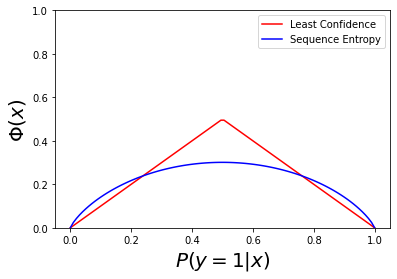

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y_lc, 'r', label="Least Confidence")
plt.plot(x,y_se,'b', label="Sequence Entropy")
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylim([0, 1])
ax.set_xlabel('$P(y=1|x)$', fontsize=20)
ax.set_ylabel('$\Phi(x)$',fontsize=20)
ax.legend()

# show the plot
plt.show()

## Uncertainty sampling with bias

### Least confidence with bias

Let $pp$ be the prior percentage of positive label. We define $P_{max} = mean(0.5, 1 - pp)$.
The least confidence with bias function is as follows:

$$ \Phi^{LCB}(x) = \left\{
    \begin{array}{ll}
        \frac{1}{P_{max}}.P(y=1|x,\theta) & \mbox{if } P(y=1|x,\theta) < P_{max} \\
        \frac{1}{1-P_{max}}.(1-P(y=1|x,\theta)) & \mbox{otherwise}
    \end{array}
\right.$$

In [104]:
def least_confidence_bias(x,pp):
    p_max = np.mean([0.5,1-pp])
    if x < p_max:
        return x*(1/p_max)
    elif x > p_max:
        return (1-x)*(1/(1-p_max))

### Illustration

In [106]:
y_lcb_01 = np.array(list(map(functools.partial(least_confidence_bias, pp=0.1), x) ))
y_lcb_03 = np.array(list(map(functools.partial(least_confidence_bias, pp=0.3), x) ))
y_lcb_05 = np.array(list(map(functools.partial(least_confidence_bias, pp=0.5), x) ))

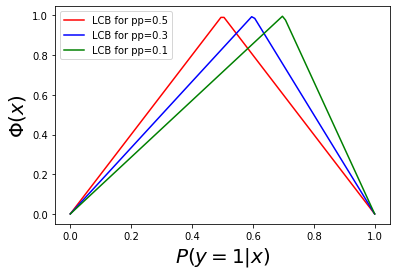

In [107]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y_lcb_05, 'r', label="LCB for pp=0.5")
plt.plot(x,y_lcb_03,'b', label="LCB for pp=0.3")
plt.plot(x,y_lcb_01,'g', label="LCB for pp=0.1")
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#ax.set_ylim([0, 1])
ax.set_xlabel('$P(y=1|x)$', fontsize=20)
ax.set_ylabel('$\Phi(x)$',fontsize=20)
ax.legend()

# show the plot
plt.show()